### Import Libraries

In [1]:
from util import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
import time
import warnings

from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df = pd.DataFrame(load_data())
print(df.shape)
df.head()

(44535, 104)


YEAR MMS  Q1- Your sex?  Q2- How old are you?  STATUS  \
0         1            2.0                   NaN     4.0   
1         1            2.0                   NaN     3.0   
2         1            2.0                   NaN     3.0   
3         1            2.0                   NaN     3.0   
4         1            2.0                   NaN     2.0   

   In which sector of activity do you work?  \
0                                       1.0   
1                                       3.0   
2                                       3.0   
3                                       3.0   
4                                       3.0   

   What is the size of your business (in total, all locations combined)? 2009 fake  \
0                                                3.0                                 
1                                                3.0                                 
2                                                3.0                                 
3                                                4.0                                 
4                                                3.0                                 

   Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                   
1                                                0.0                                                                   
2                                                2.0                                                                   
3                                                0.0                                                                   
4                                                0.0                                                                   

   Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                0.0                                                                    

   Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                     
1                                                0.0                                                                     
2                                                0.0                                                                     
3                                                0.0                                                                     
4                                                2.0                                                                     

   Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                2.0    

In [3]:
df.describe()

YEAR MMS  Q1- Your sex?  Q2- How old are you?        STATUS  \
count  44535.000000   44501.000000          42194.000000  44533.000000   
mean       5.725250       1.470596              7.279021      2.602677   
std        2.753581       0.499140             12.925888      1.159376   
min        1.000000       1.000000              1.000000      1.000000   
25%        3.000000       1.000000              2.000000      1.000000   
50%        6.000000       1.000000              3.000000      3.000000   
75%        8.000000       2.000000              5.000000      4.000000   
max       10.000000       2.000000             76.000000      4.000000   

       In which sector of activity do you work?  \
count                              44533.000000   
mean                                   4.367009   
std                                    2.916375   
min                                    1.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    8.000000   
max                                    9.000000   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
count                                       44509.000000                                 
mean                                            2.829630                                 
std                                             1.268036                                 
min                                             1.000000                                 
25%                                             2.000000                                 
50%                                             3.000000                                 
75%                                             4.000000                                 
max                                             6.000000                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42873.000000                                                                   
mean                                            0.204604                                                                   
std                                             0.495812                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42872.000000                                                                    
mean                                            0.272229                                                                    
std                                             0.599071                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                         

### Clean the data

In [4]:
cleaned_df = clean_data(df)

In [5]:
print(cleaned_df.shape)
cleaned_df.describe()

(44535, 103)


Q1- Your sex?  Q2- How old are you?        STATUS  \
count   44501.000000          42194.000000  44533.000000   
mean        1.470596              3.022231      2.602677   
std         0.499140              1.604283      1.159376   
min         1.000000              1.000000      1.000000   
25%         1.000000              2.000000      1.000000   
50%         1.000000              3.000000      3.000000   
75%         2.000000              4.000000      4.000000   
max         2.000000              6.000000      4.000000   

       In which sector of activity do you work?  \
count                              44533.000000   
mean                                   4.367009   
std                                    2.916375   
min                                    1.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    8.000000   
max                                    9.000000   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
count                                       44509.000000                                 
mean                                            2.829630                                 
std                                             1.268036                                 
min                                             1.000000                                 
25%                                             2.000000                                 
50%                                             3.000000                                 
75%                                             4.000000                                 
max                                             6.000000                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42873.000000                                                                   
mean                                            0.204604                                                                   
std                                             0.495812                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42872.000000                                                                    
mean                                            0.272229                                                                    
std                                             0.599071                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                      

In [6]:
# Using MICE to impute missing values
for col in cleaned_df.columns:
    impulated = mice(cleaned_df, [col])
    cleaned_df.loc[:, col] = impulated

In [7]:
print(cleaned_df.shape)
cleaned_df.describe()

(44535, 103)


Q1- Your sex?  Q2- How old are you?        STATUS  \
count   44535.000000          44535.000000  44535.000000   
mean        1.470237              3.021062      2.602695   
std         0.499119              1.561556      1.159353   
min         1.000000              1.000000      1.000000   
25%         1.000000              2.000000      1.000000   
50%         1.000000              3.000000      3.000000   
75%         2.000000              4.000000      4.000000   
max         2.000000              6.000000      4.000000   

       In which sector of activity do you work?  \
count                              44535.000000   
mean                                   4.366992   
std                                    2.916311   
min                                    1.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    8.000000   
max                                    9.000000   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
count                                       44535.000000                                 
mean                                            2.829729                                 
std                                             1.267672                                 
min                                             1.000000                                 
25%                                             2.000000                                 
50%                                             3.000000                                 
75%                                             4.000000                                 
max                                             6.000000                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       44535.000000                                                                   
mean                                            0.196969                                                                   
std                                             0.488016                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       44535.000000                                                                    
mean                                            0.262064                                                                    
std                                             0.590041                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                      

In [8]:
# Categorising the results data and dropping the original columns
cleaned_df = categorise(cleaned_df)
print(cleaned_df.shape)
cleaned_df.describe()

(44535, 99)


Q1- Your sex?  Q2- How old are you?        STATUS  \
count   44535.000000          44535.000000  44535.000000   
mean        1.470237              3.021062      2.602695   
std         0.499119              1.561556      1.159353   
min         1.000000              1.000000      1.000000   
25%         1.000000              2.000000      1.000000   
50%         1.000000              3.000000      3.000000   
75%         2.000000              4.000000      4.000000   
max         2.000000              6.000000      4.000000   

       In which sector of activity do you work?  \
count                              44535.000000   
mean                                   4.366992   
std                                    2.916311   
min                                    1.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    8.000000   
max                                    9.000000   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
count                                       44535.000000                                 
mean                                            2.829729                                 
std                                             1.267672                                 
min                                             1.000000                                 
25%                                             2.000000                                 
50%                                             3.000000                                 
75%                                             4.000000                                 
max                                             6.000000                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       44535.000000                                                                   
mean                                            0.196969                                                                   
std                                             0.488016                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       44535.000000                                                                    
mean                                            0.262064                                                                    
std                                             0.590041                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                      

## Training of the data


#### split data to train and test sets

In [9]:
data = cleaned_df

# Split the data for training and evaluation

X = data.drop('outcome', axis=1, inplace=False)
y = data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


#### Train the Random Forest model

In [10]:
# Fit RF (blackbox) model
sl = RandomForestClassifier(class_weight='balanced')
sl.fit(X_train, y_train)
y_pred = sl.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.34034536480392846
Accuracy 0.7824183226675648


## Explanantion using SHAP

In [11]:
explainer = shap.TreeExplainer(sl)

# Calculate shapley values for test data
start_index = 0
end_index = 10

# time to run 10 samples
s_time = time.time()
shap_values = explainer.shap_values(X_test[start_index:end_index]) # 0 - 9
e_time = time.time()
time_e(s_time, e_time, f"Shapley values for test data[{start_index}:{end_index}]")
X_test[start_index:end_index]

Q1- Your sex?  Q2- How old are you?  STATUS  \
24039            2.0                   3.0     3.0   
34659            2.0                   1.0     3.0   
21130            1.0                   3.0     3.0   
1673             2.0                   3.0     1.0   
37471            1.0                   5.0     4.0   
39520            1.0                   2.0     4.0   
30833            1.0                   3.0     1.0   
5266             2.0                   2.0     1.0   
6319             1.0                   1.0     4.0   
28507            1.0                   2.0     1.0   

       In which sector of activity do you work?  \
24039                                       8.0   
34659                                       8.0   
21130                                       8.0   
1673                                        3.0   
37471                                       2.0   
39520                                       1.0   
30833                                       8.0   
5266                                        3.0   
6319                                        1.0   
28507                                       7.0   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
24039                                                3.0                                 
34659                                                1.0                                 
21130                                                1.0                                 
1673                                                 4.0                                 
37471                                                4.0                                 
39520                                                3.0                                 
30833                                                4.0                                 
5266                                                 4.0                                 
6319                                                 1.0                                 
28507                                                4.0                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
24039                                                0.0                                                                   
34659                                                0.0                                                                   
21130                                                0.0                                                                   
1673                                                 0.0                                                                   
37471                                                0.0                                                                   
39520                                                2.0                                                                   
30833                                                0.0                                                                   
5266                                                 0.0                                                                   
6319                                                 0.0                                                                   
28507                                                0.0                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
24039                                                0.0                                                                    
34659                                                0.0                                                                    
21130                                                0.0                                                               

In [12]:
y_test[start_index:end_index]

24039    0
34659    0
21130    0
1673     0
37471    0
39520    1
30833    0
5266     0
6319     0
28507    0
Name: outcome, dtype: int64

### SHAP Values

In [13]:
print(shap_values[0].shape)
shap_values

(98, 3)


array([[[-4.11909226e-03,  3.53493141e-03,  5.84160849e-04],
        [ 6.72583686e-03, -2.97269557e-03, -3.75314129e-03],
        [ 5.26785362e-03, -8.05294913e-04, -4.46255871e-03],
        ...,
        [-8.45877741e-03,  8.81728405e-03, -3.58506646e-04],
        [-7.85994862e-03,  6.56123842e-03,  1.29871020e-03],
        [ 8.04428513e-03, -4.53558870e-04, -7.59072625e-03]],

       [[-3.58005724e-03,  3.66852250e-03, -8.84652594e-05],
        [ 1.14261700e-02,  3.25743907e-03, -1.46836091e-02],
        [ 4.10045477e-03,  1.16016055e-03, -5.26061532e-03],
        ...,
        [ 8.12834159e-03,  5.44002208e-04, -8.67234380e-03],
        [ 1.09234313e-02, -1.55064046e-03, -9.37279085e-03],
        [ 6.44832335e-03,  6.27691217e-04, -7.07601457e-03]],

       [[ 1.36305654e-02, -8.80215795e-03, -4.82840744e-03],
        [ 7.55108620e-03, -3.76165700e-03, -3.78942920e-03],
        [ 7.48424462e-03, -2.80132544e-03, -4.68291917e-03],
        ...,
        [ 8.48833206e-03, -1.50660646e-03,

In [14]:
shap.initjs()
# Force plot
prediction = sl.predict(X_test[start_index:end_index])[0]
print(f"The sl predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[...,1],
                X_test[start_index:end_index])  # for values

The sl predicted: 0


### Summary of Variables that affected the prediction using SHAP

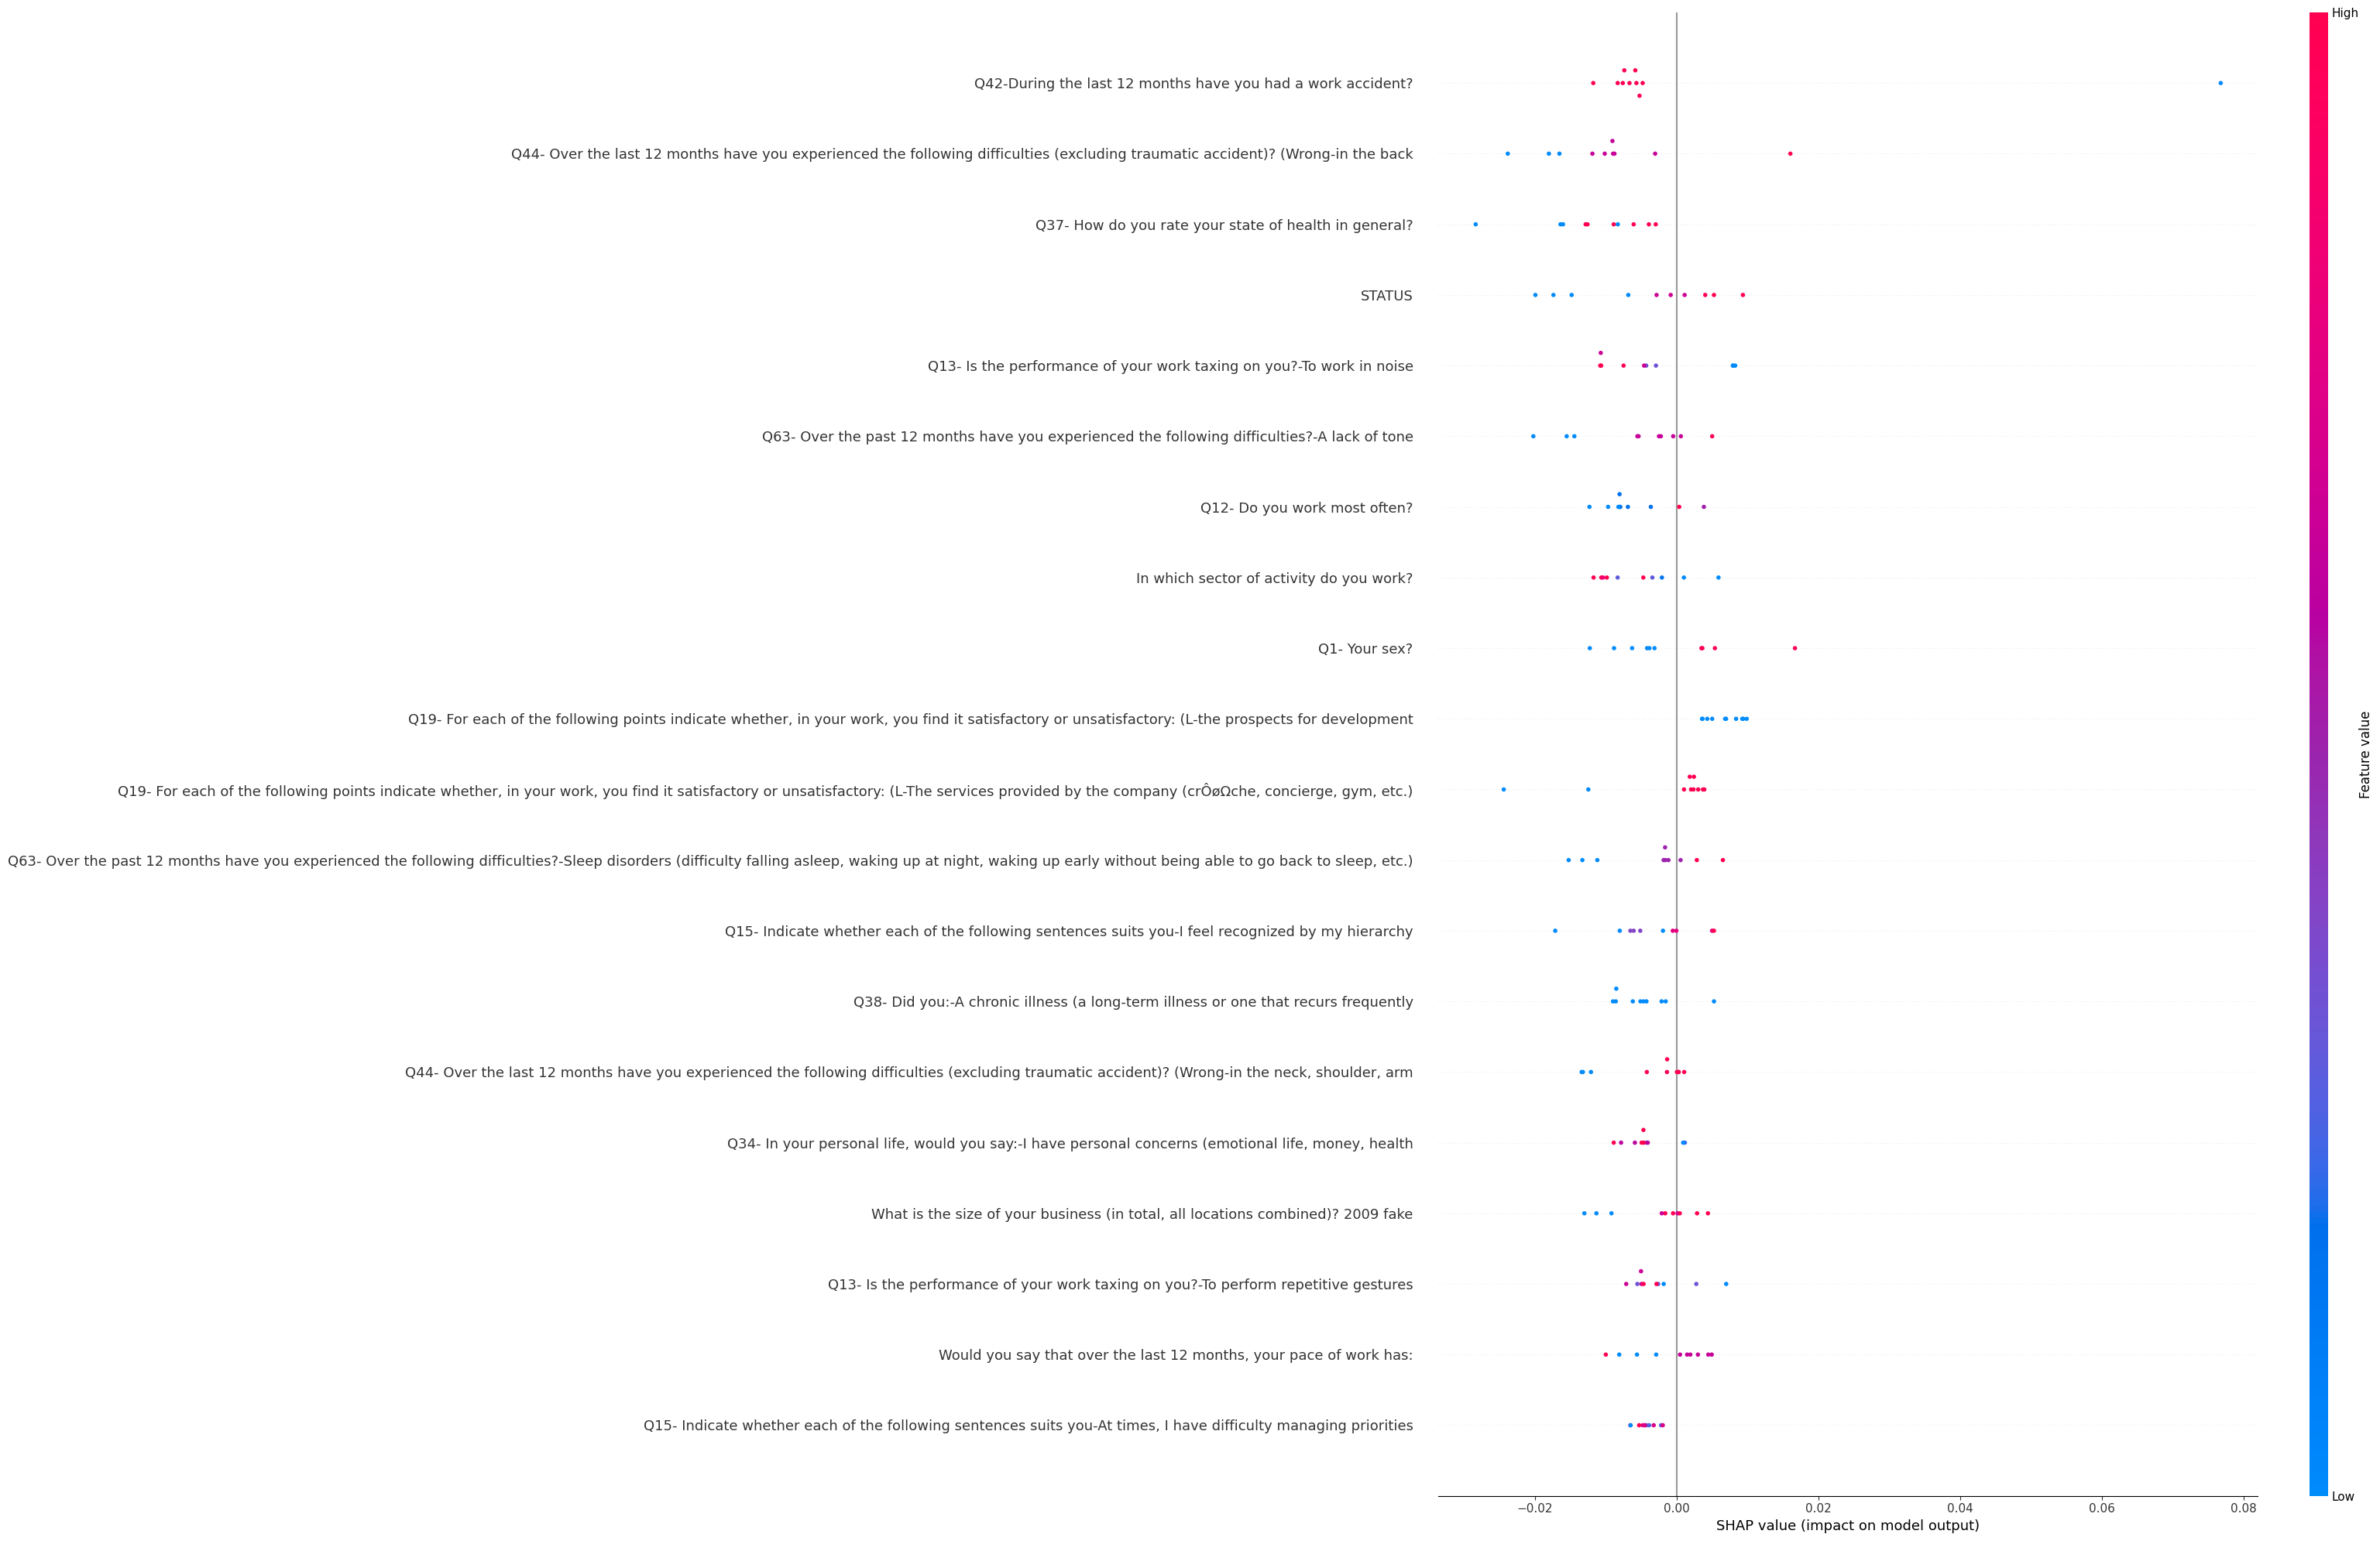

In [38]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index], plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/summary_plot_for_10_samples.png')
plt.show()

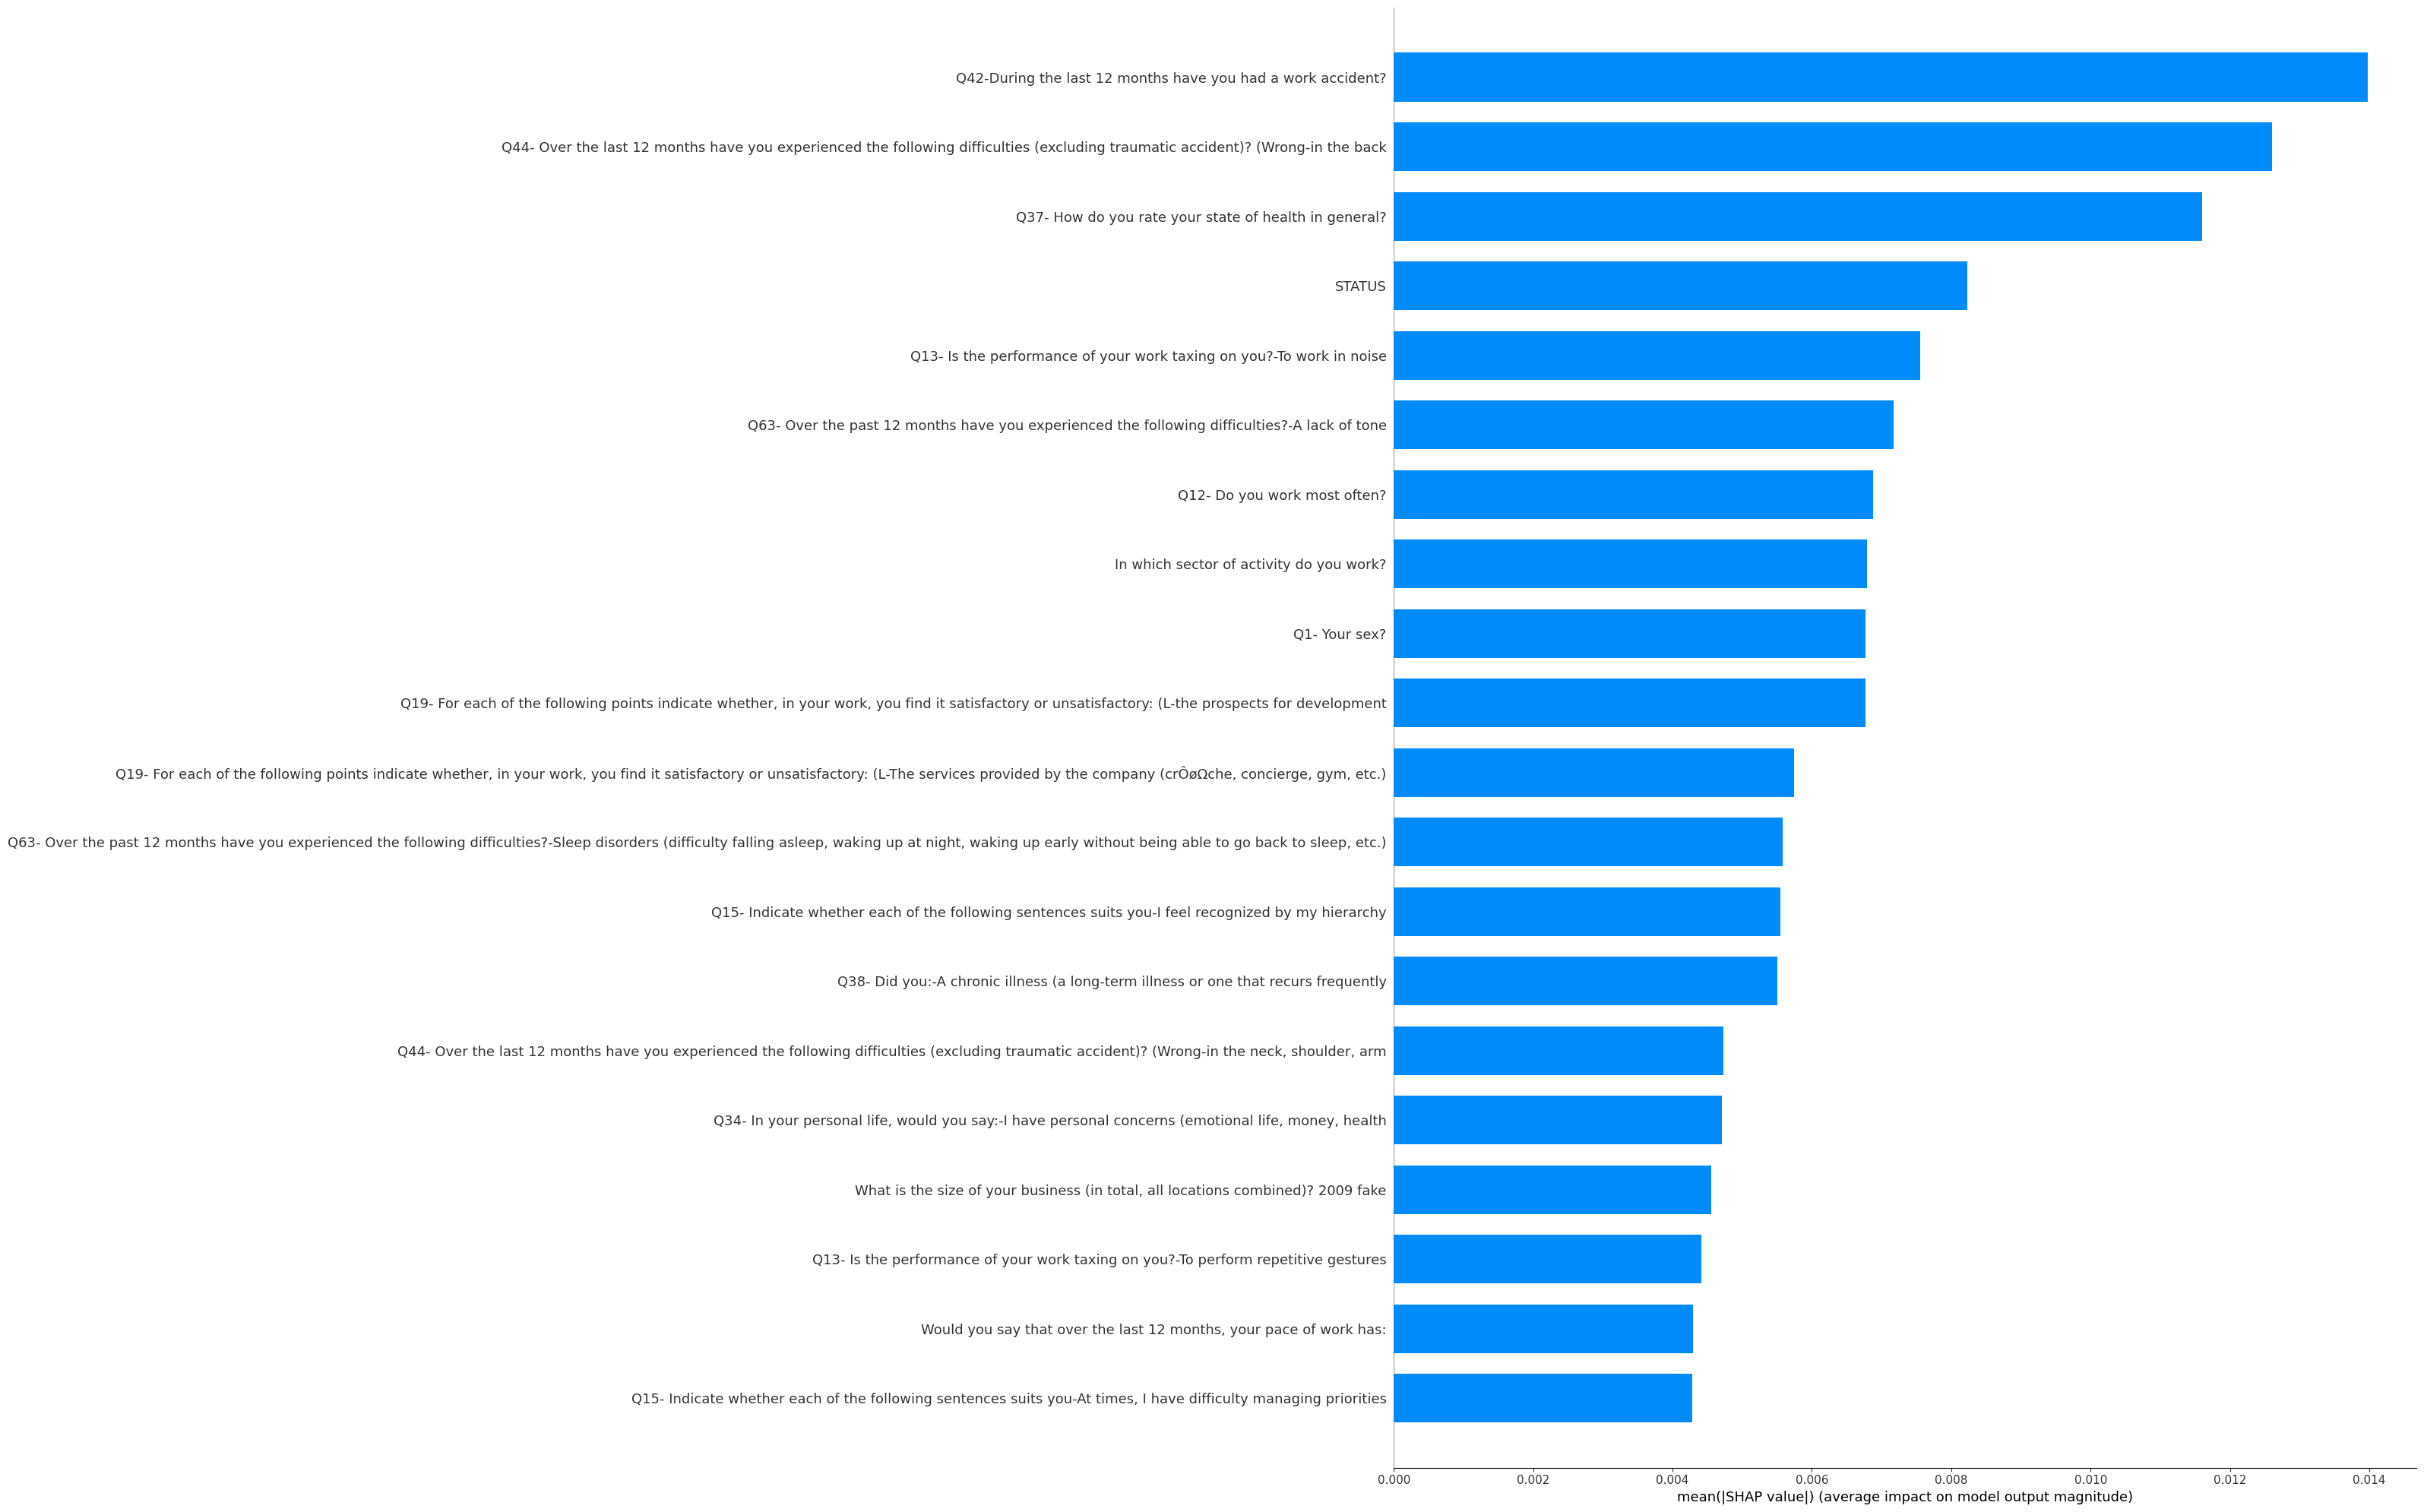

In [39]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index], plot_type="bar", plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/summary_plot_bar_for_10_samples.png')
plt.show()

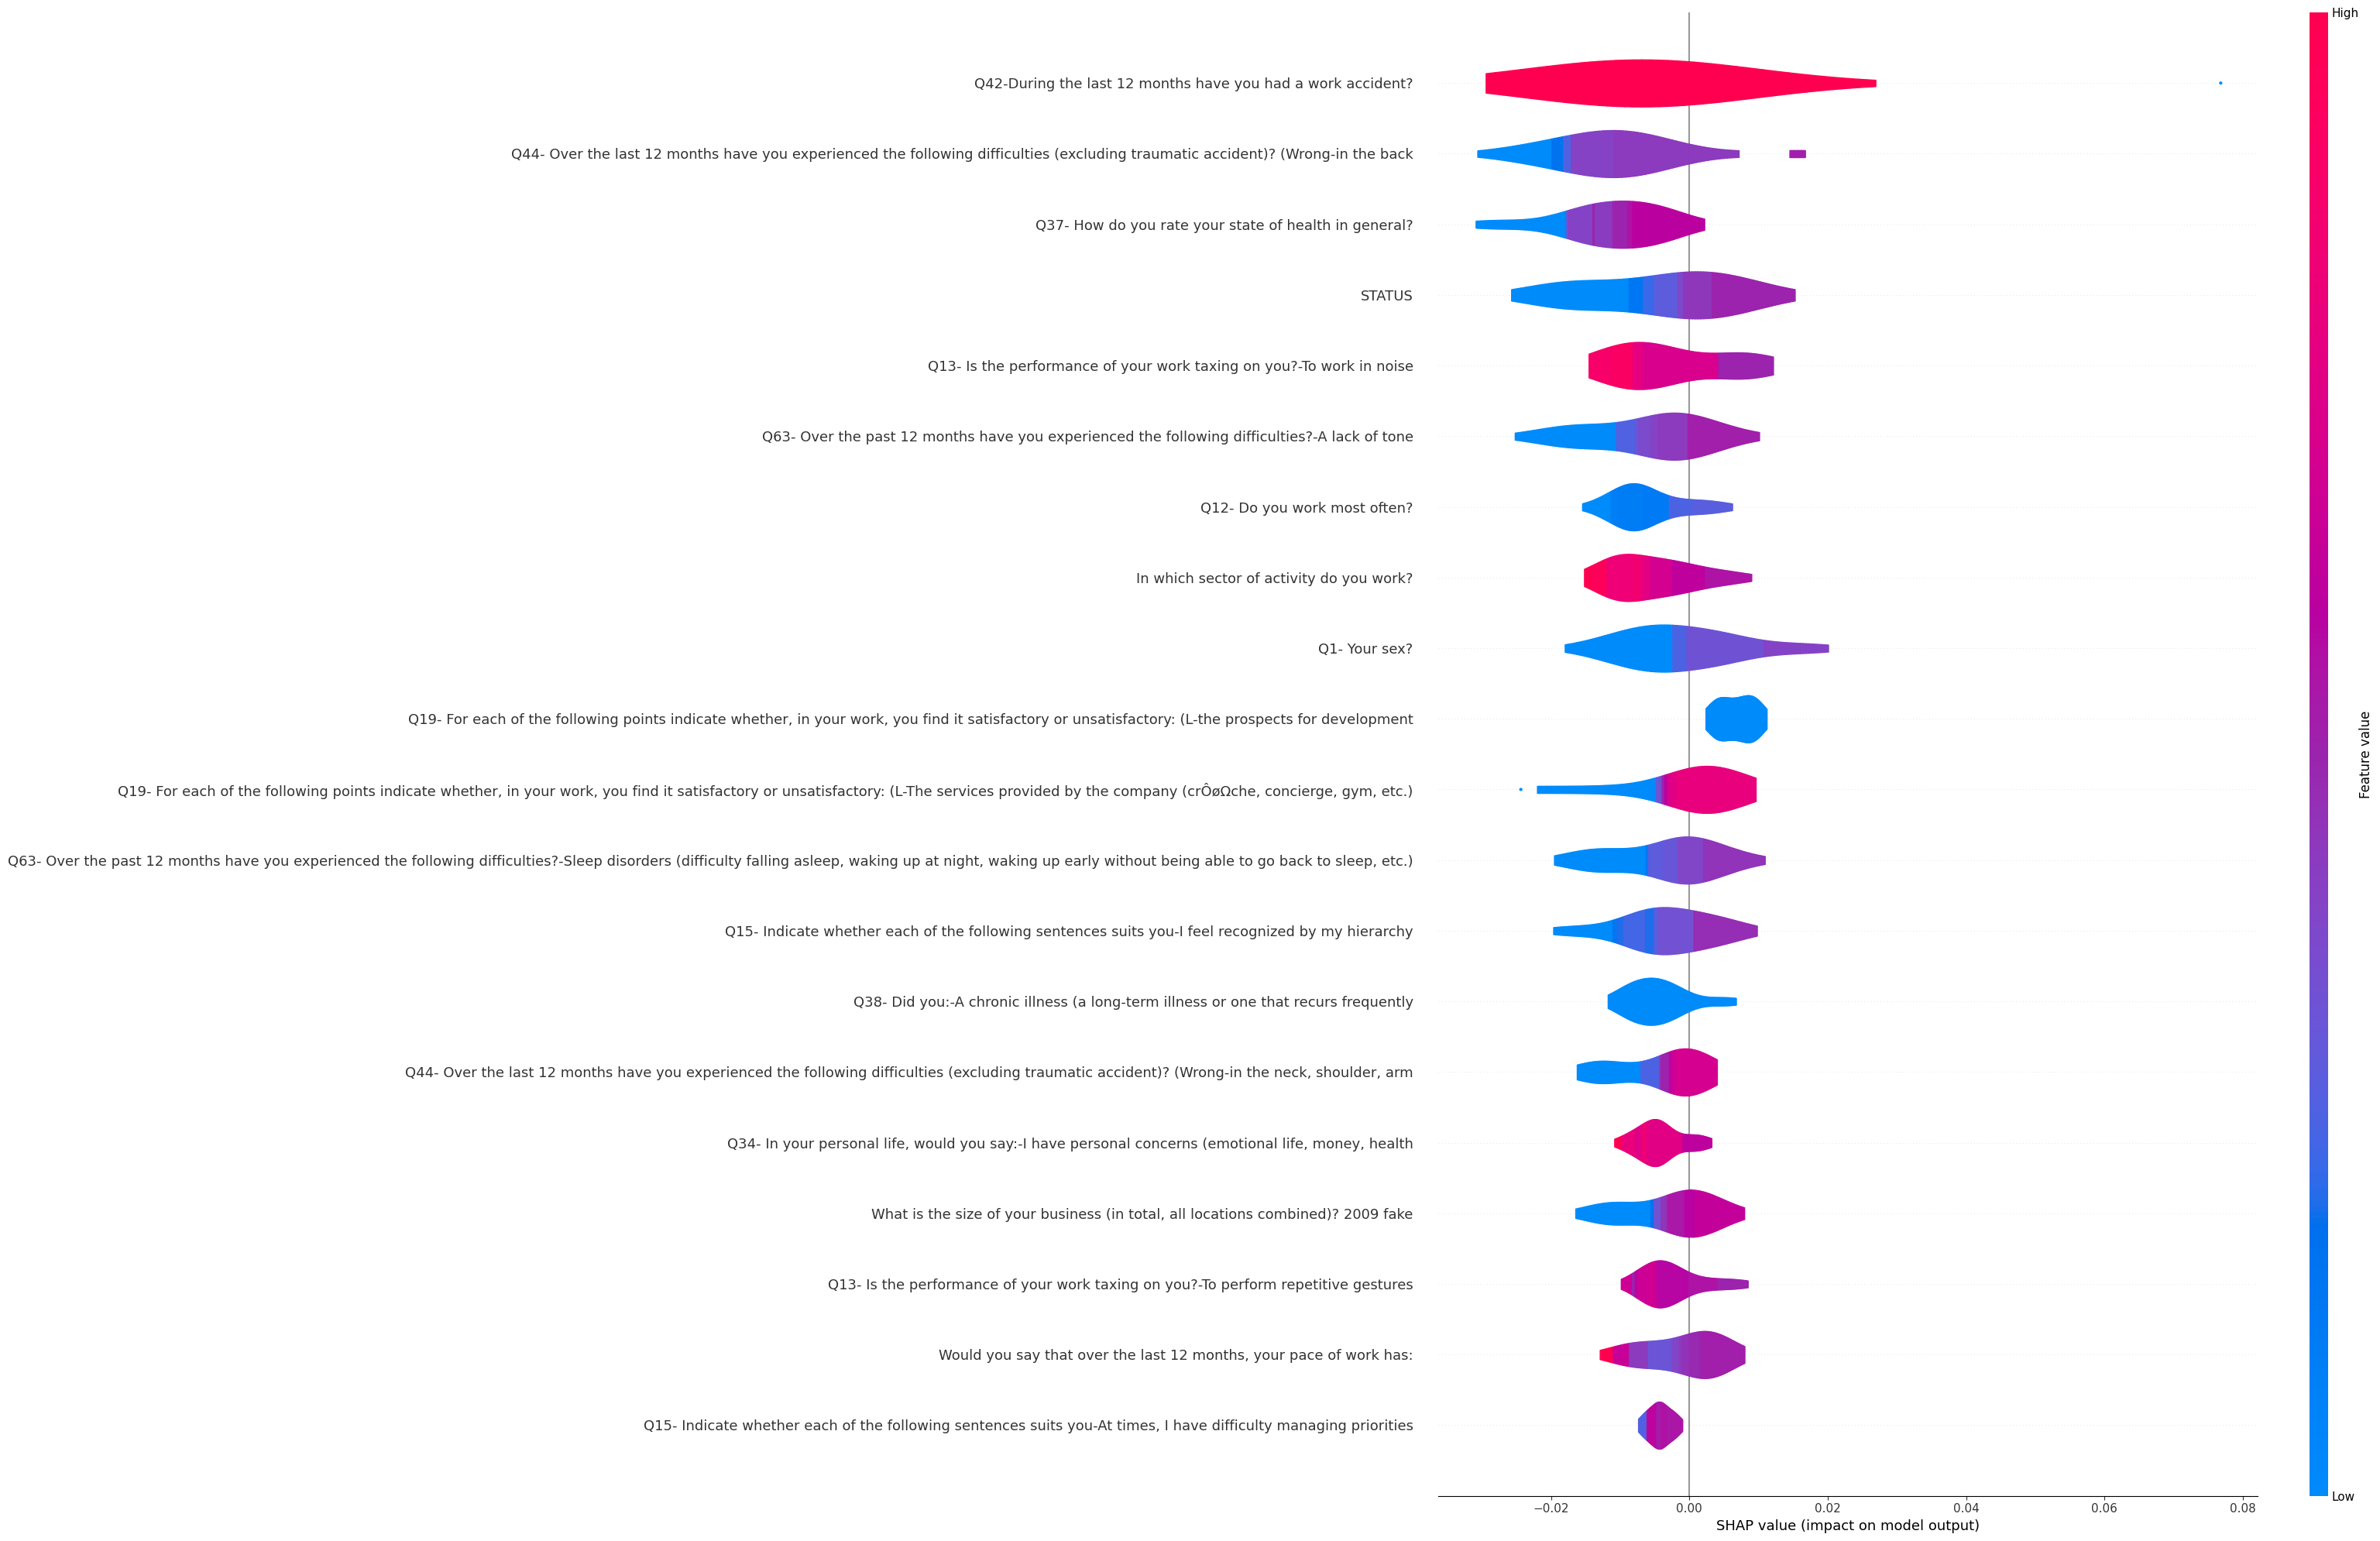

In [40]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index], plot_type="violin", plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/summary_plot_violin_for_10_samples.png')
plt.show()

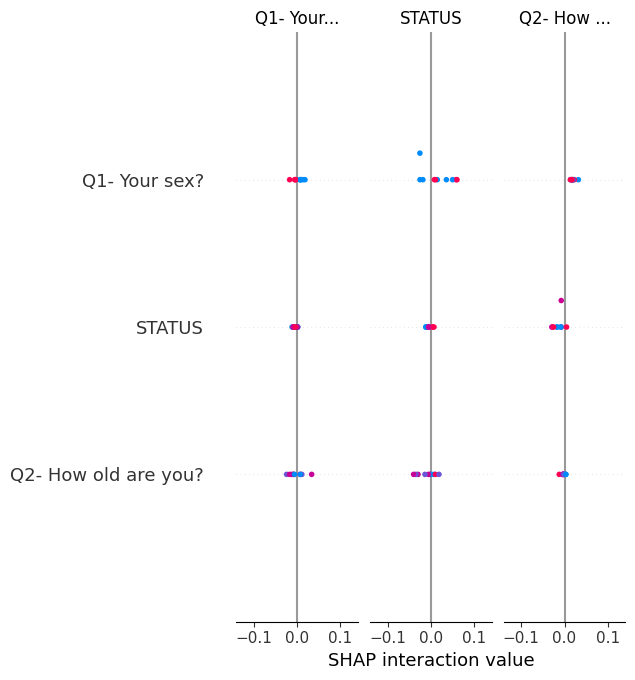

In [41]:
# Shap interaction values

shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar", plot_size=(18,12), show=False)
plt.savefig('outputs/01_SHAP/summary_plot_bar_interaction_for_10_samples.png')
plt.show()

In [20]:
# Calculate shapley values for all data
s_time = time.time()
shap_values_all = explainer.shap_values(X_test)
e_time = time.time()
print(time_e(s_time, e_time, "Shapley values for all data"))

Elapsed time to compute Shapley values for all data: 95 minutes and 50 seconds


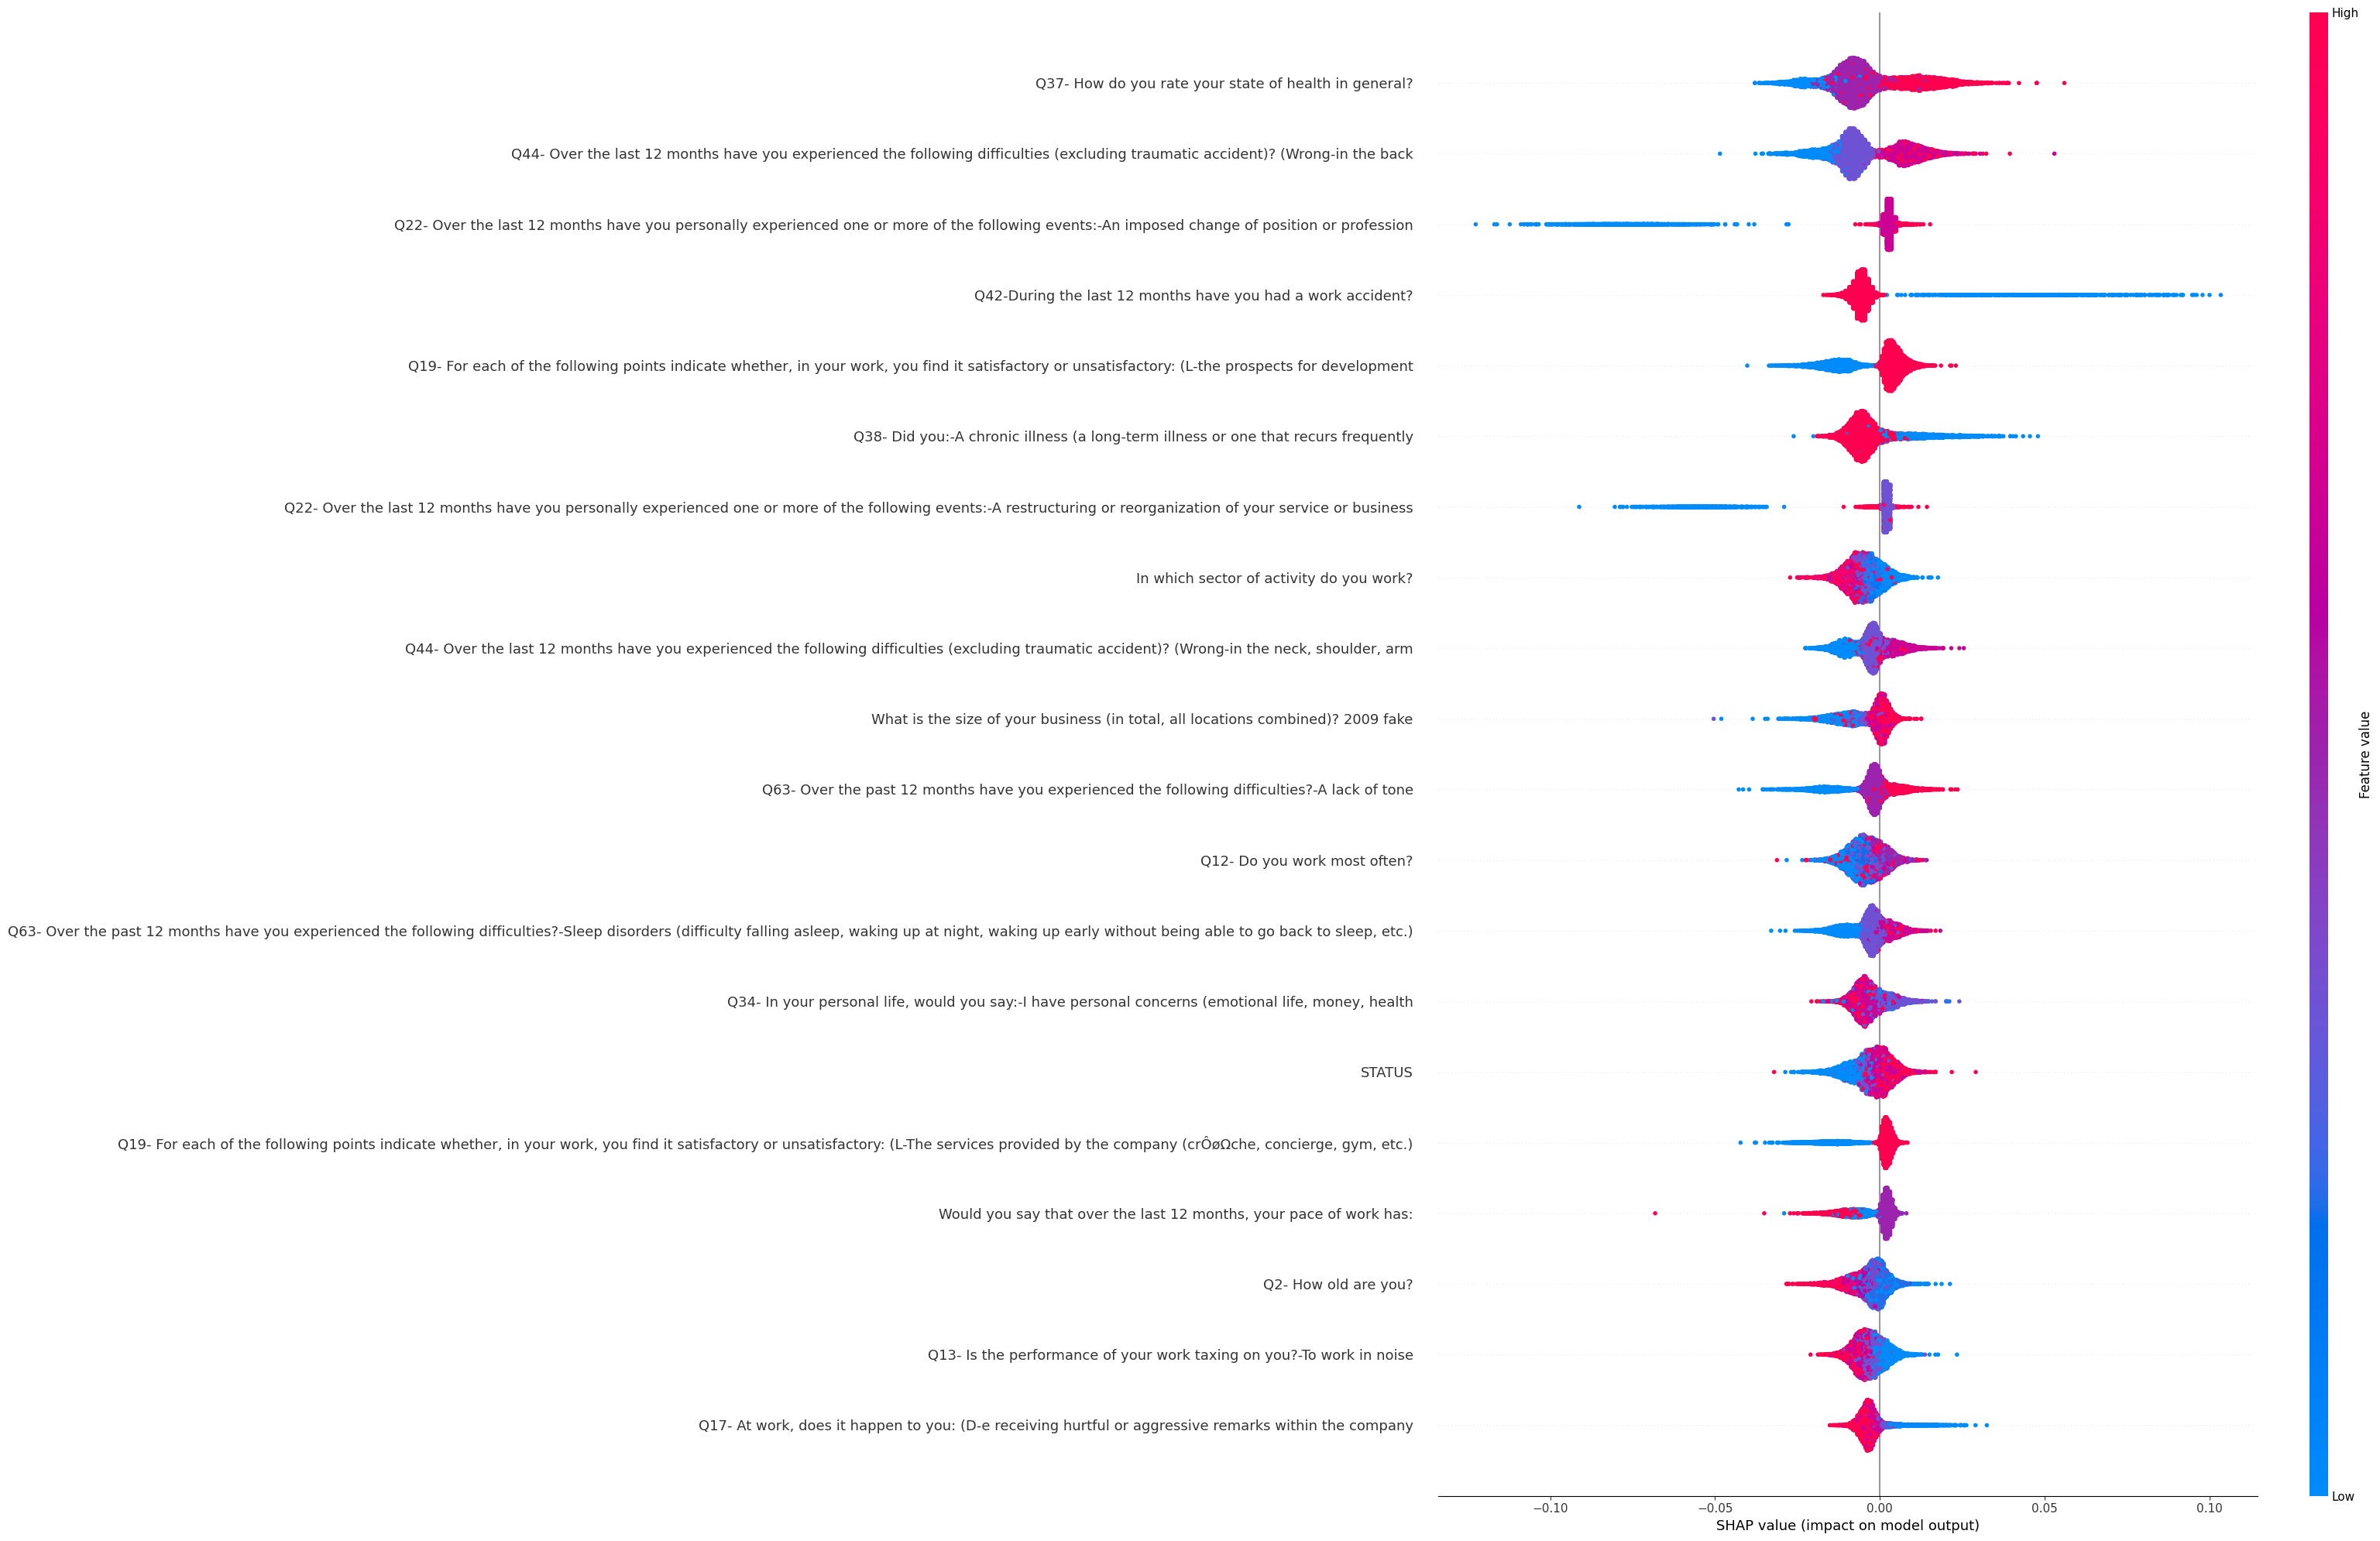

Elapsed time to compute Summary plot for all data: 0 minutes and 2 seconds


In [37]:
s_time = time.time()
shap.summary_plot(shap_values_all[...,1], X_test, plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/shap_summary_plot_all.png')
plt.show()
e_time = time.time()
print(time_e(s_time, e_time, "Summary plot for all data"))

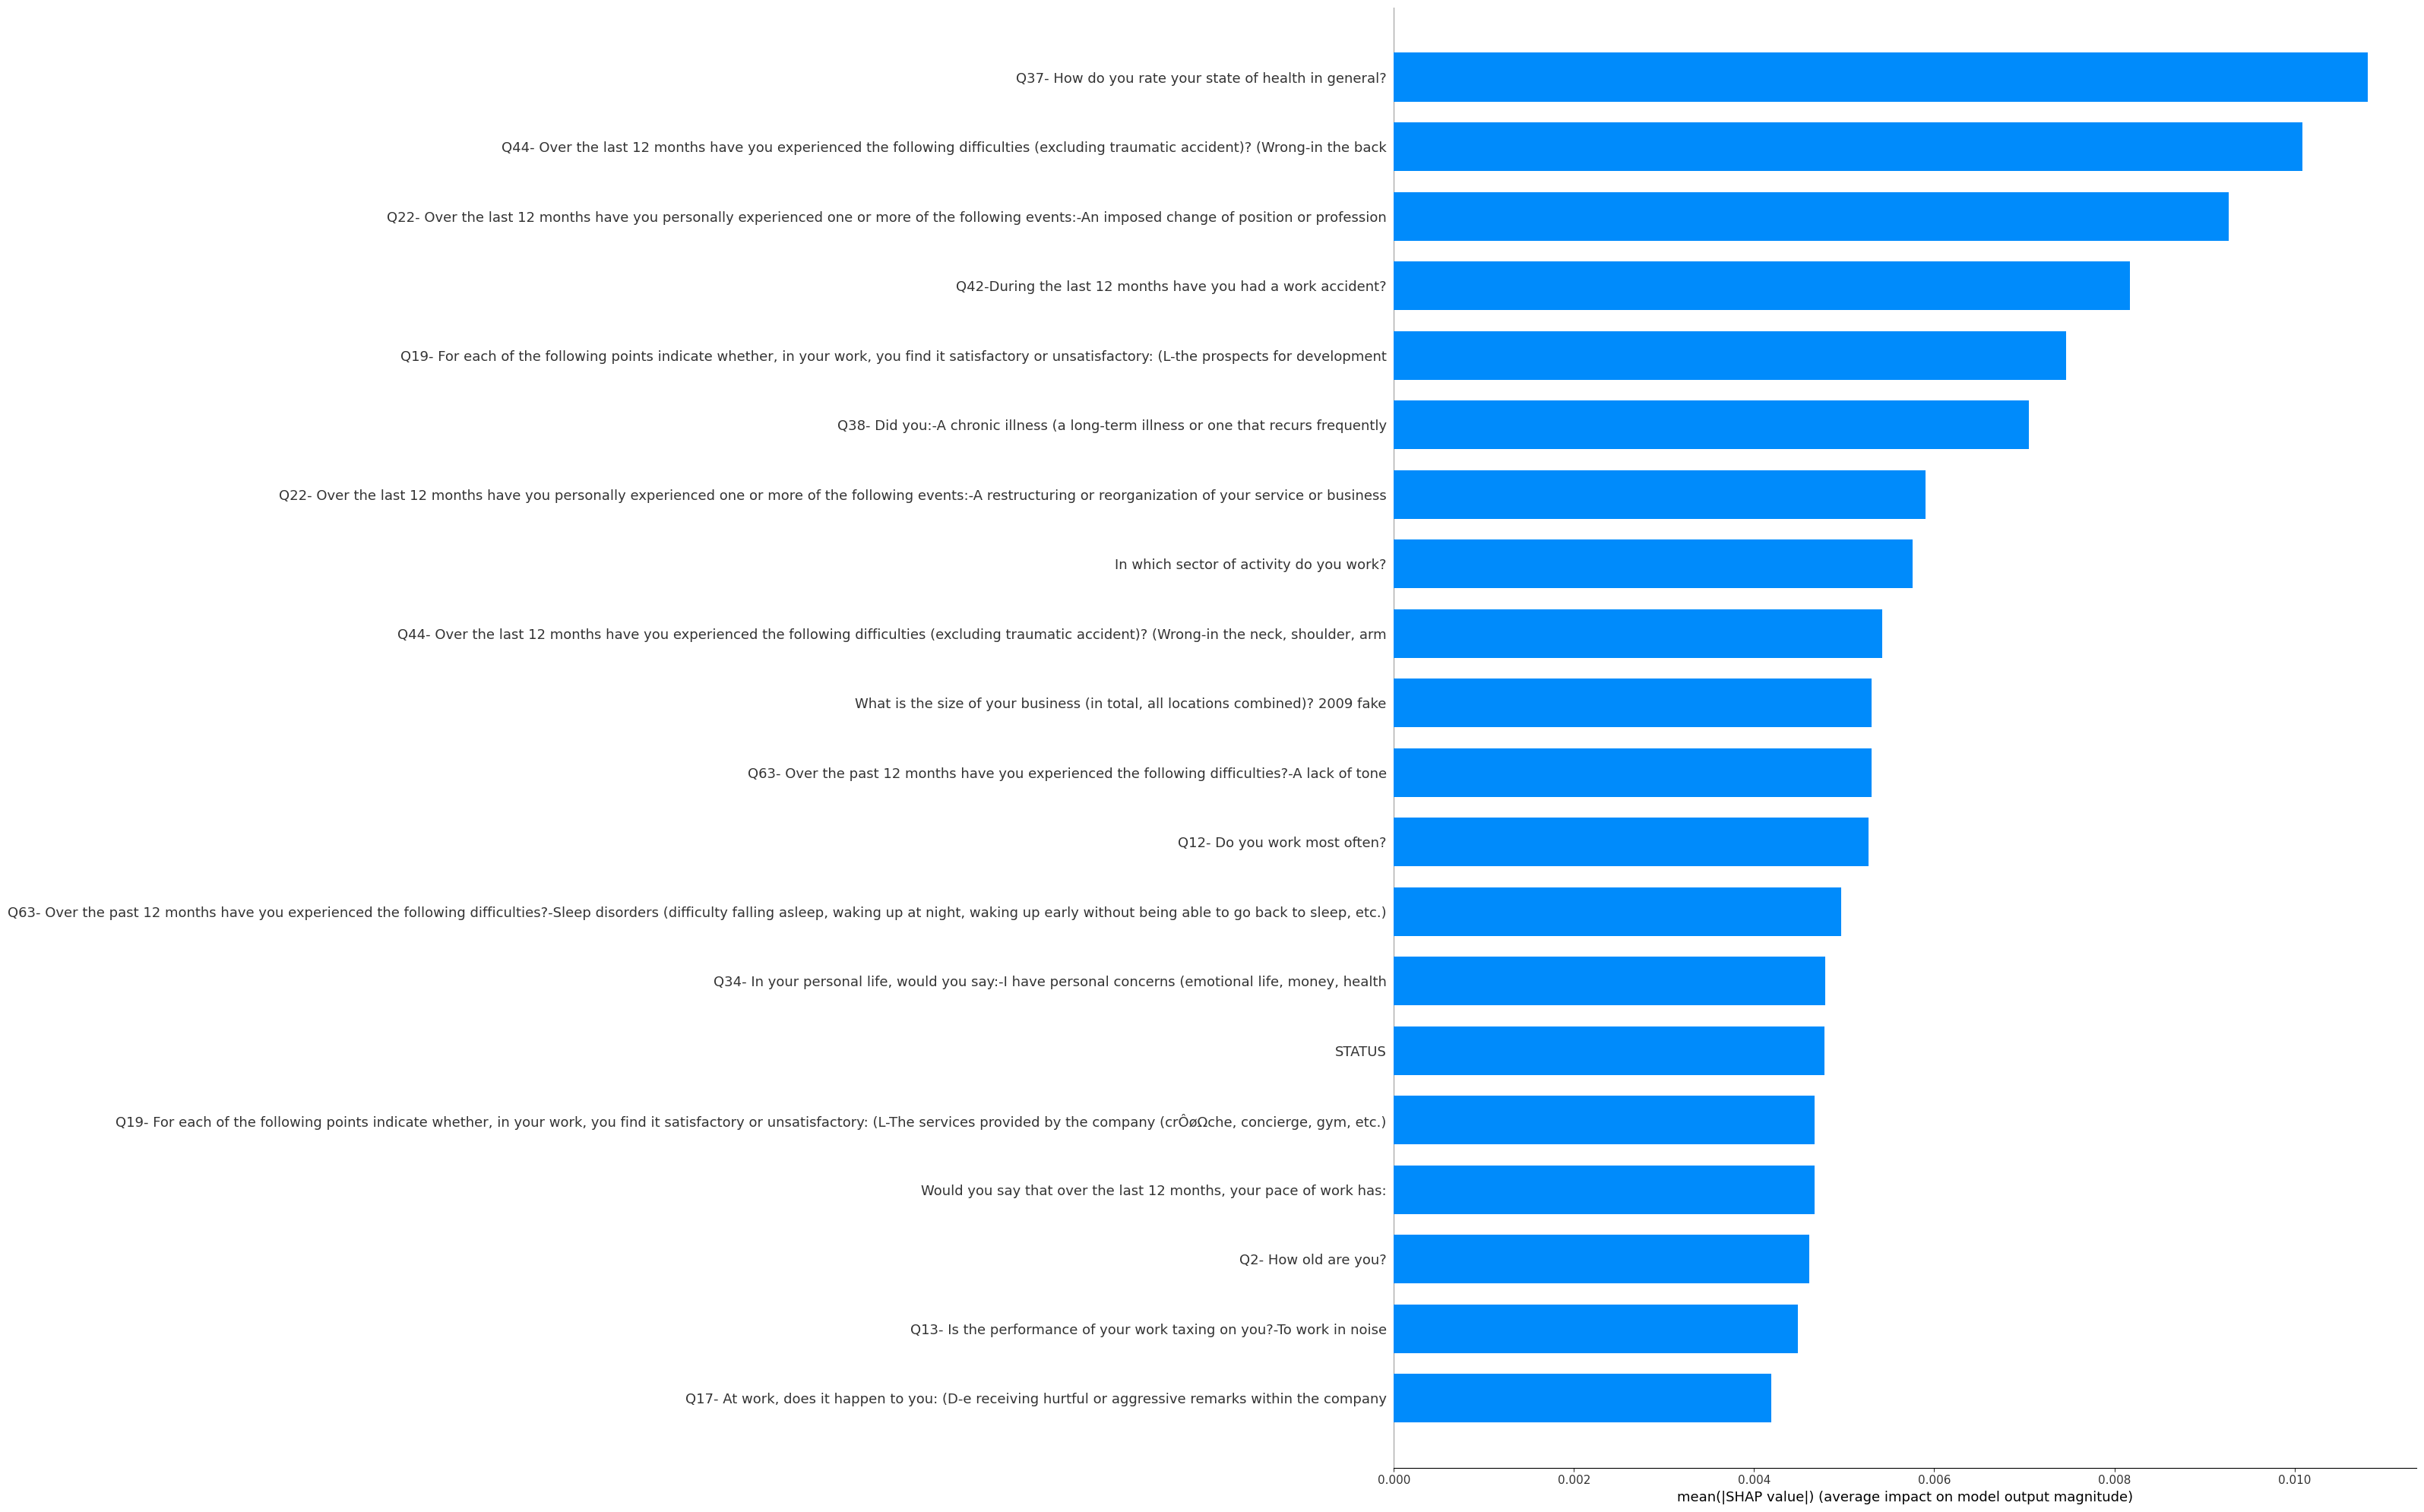

In [42]:
shap.summary_plot(shap_values_all[...,1], X_test, plot_type="bar", plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/shap_summary_plot_bar_all.png')
plt.show() 

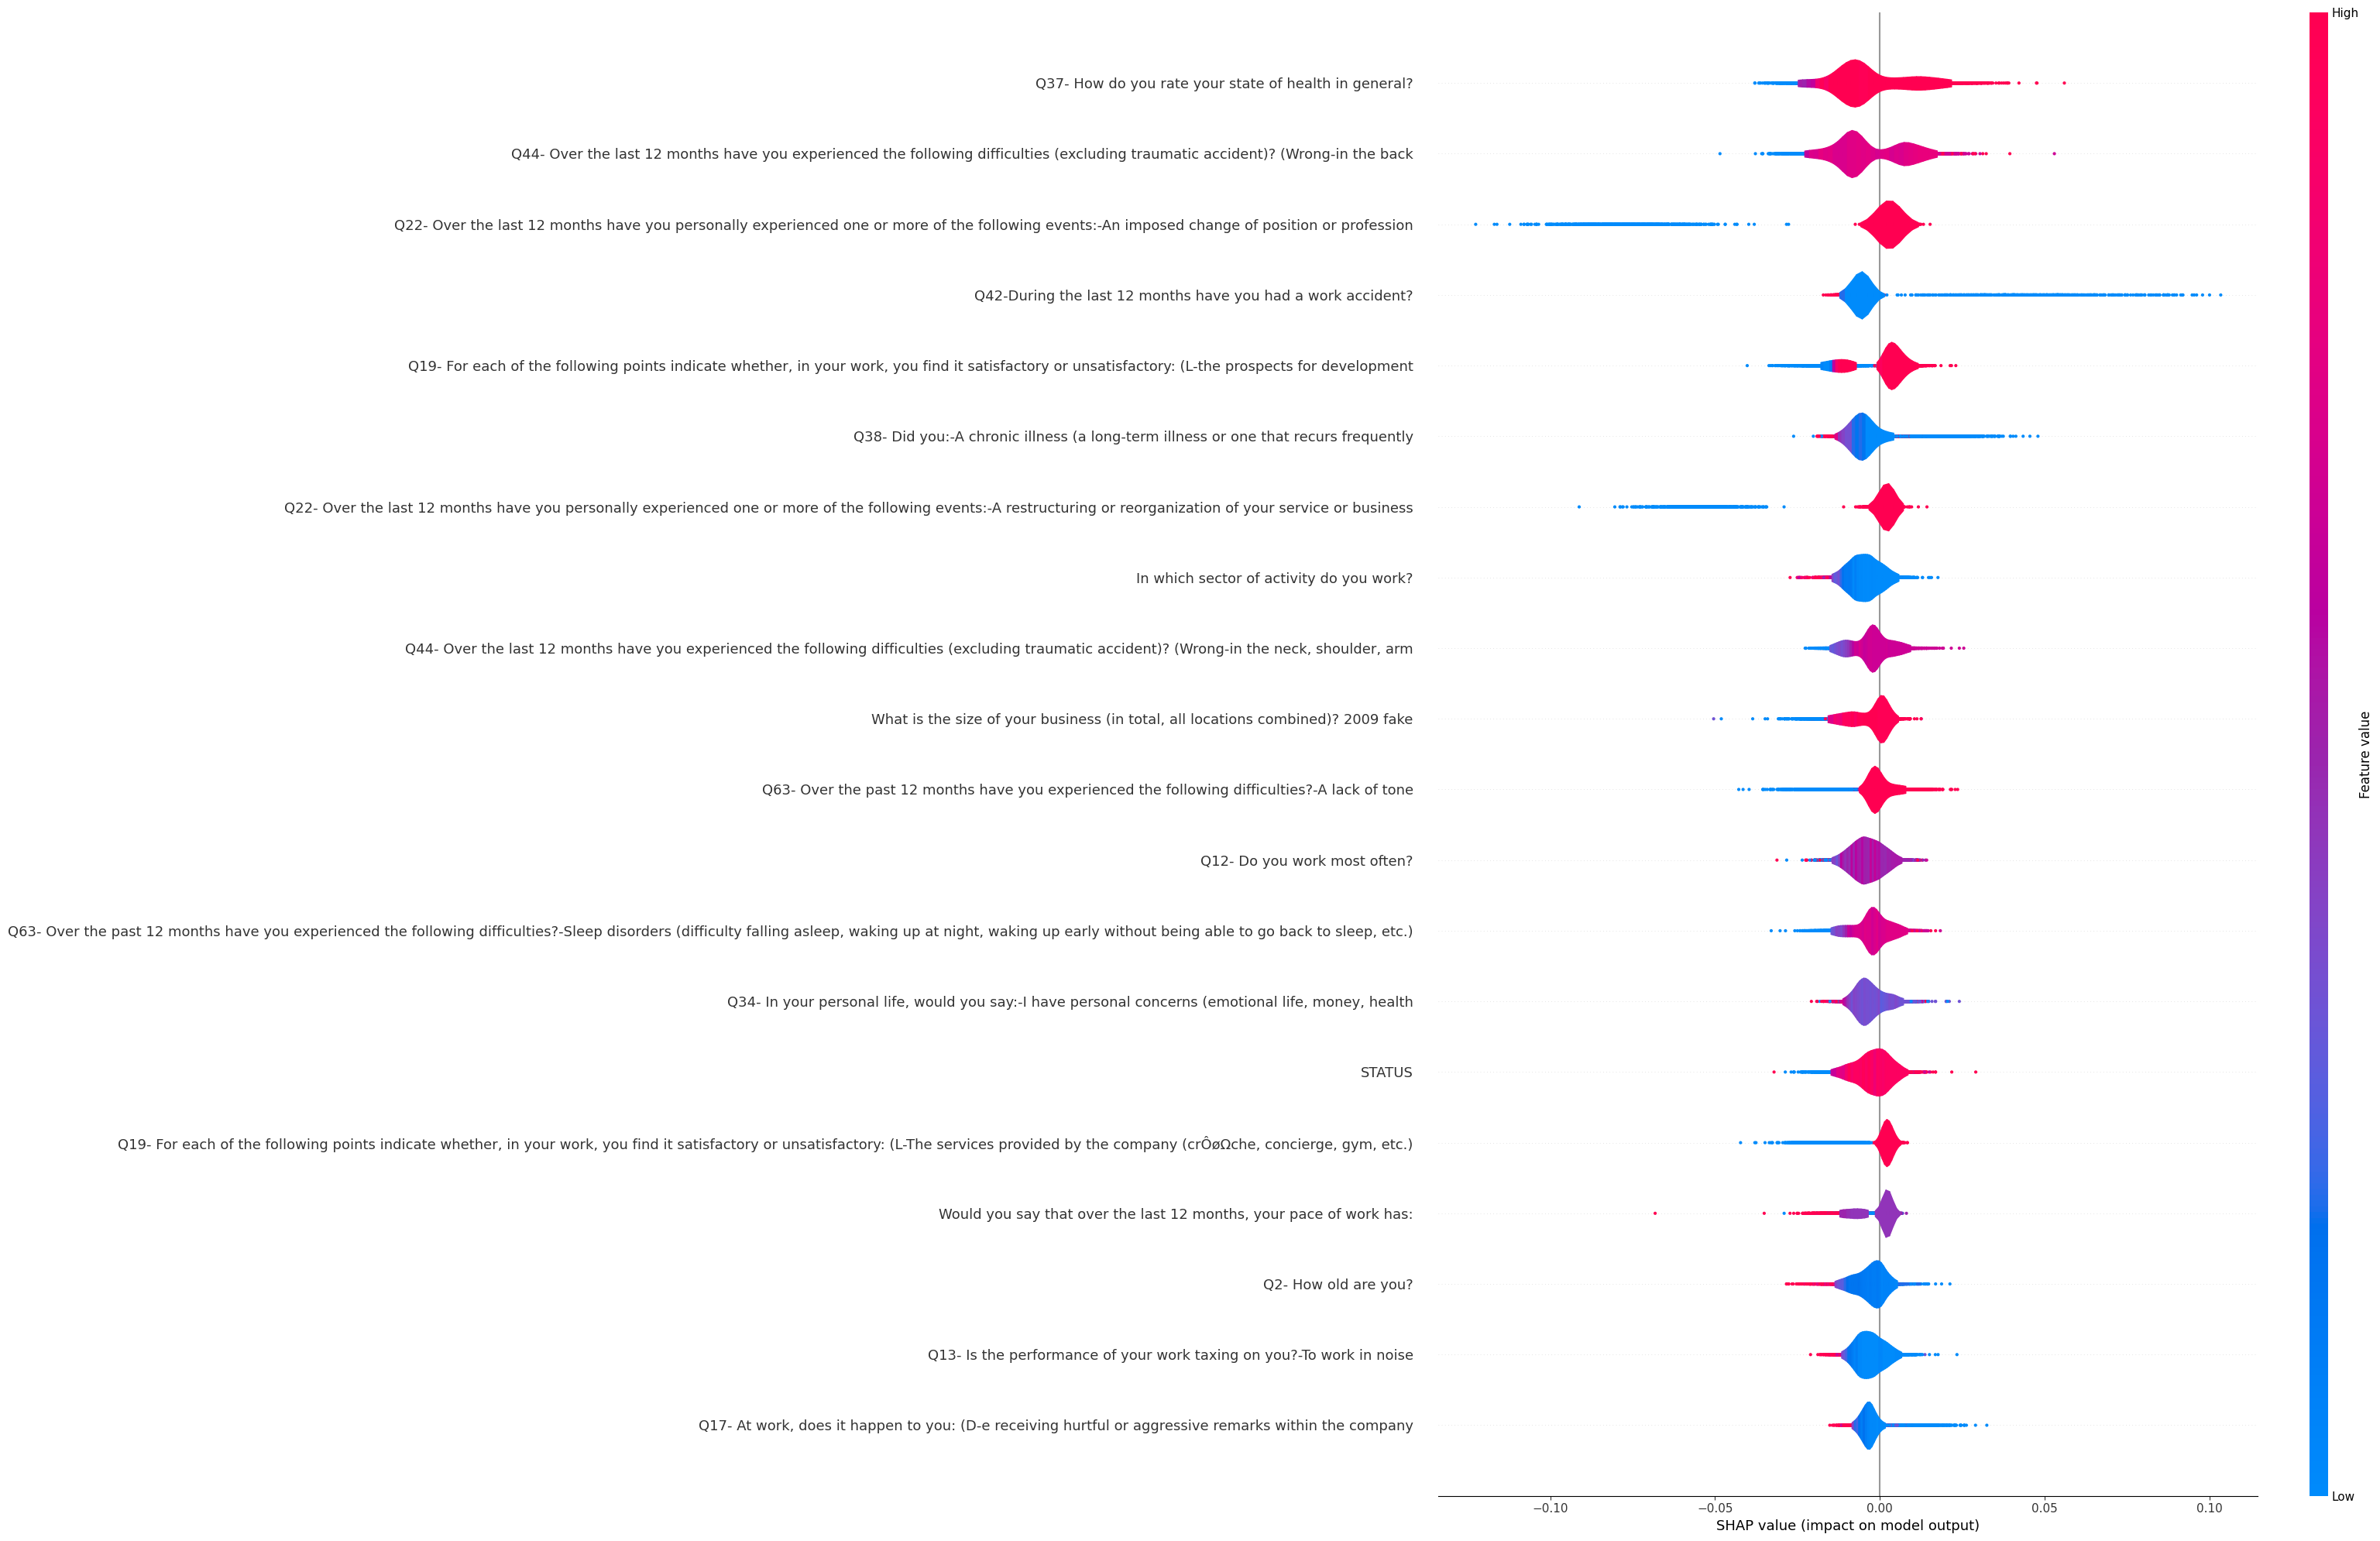

In [43]:
shap.summary_plot(shap_values_all[...,1], X_test, plot_type="violin", plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/shap_summary_plot_violin_all.png')
plt.show()

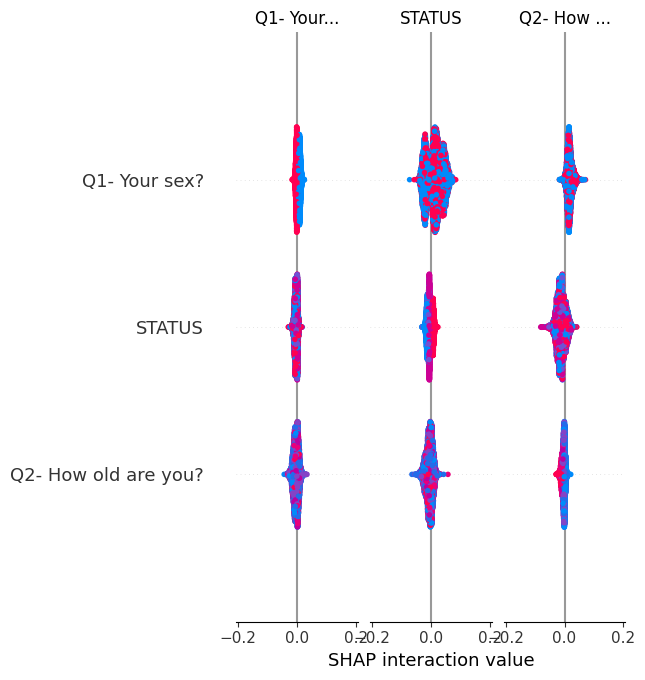

In [44]:
# get the most important feature

shap.summary_plot(shap_values_all, X_test, plot_type="bar", plot_size=(32,20), show=False)
plt.savefig('outputs/01_SHAP/shap_summary_plot_bar_interaction_all.png')
plt.show()

### XGBoost
max_depth = 3

In [72]:
# !pip install xgboost
import xgboost
from sklearn.linear_model import LinearRegression

# train a model with single tree
Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train({"eta": 1, "max_depth": 3, "base_score": 0, "lambda": 0}, Xd, 1)

print("Model error =", np.linalg.norm(y - model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

Model error = 115.70703738614087
0:[Q37- How do you rate your state of health in general?<3] yes=1,no=2,missing=2,gain=734.686035,cover=44535
	1:[Q42-During the last 12 months have you had a work accident?<2] yes=3,no=4,missing=4,gain=291.296387,cover=30778
		3:[Q22- Over the last 12 months have you personally experienced one or more of the following events:-An imposed change of position or profession<3] yes=7,no=8,missing=8,gain=37.1071777,cover=1296
			7:leaf=0.095238097,cover=105
			8:leaf=0.715365231,cover=1191
		4:[Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-the prospects for development<2] yes=9,no=10,missing=10,gain=63.6107788,cover=29482
			9:leaf=0.120208584,cover=10931
			10:leaf=0.216376469,cover=18551
	2:[Q38- Did you:-A chronic illness (a long-term illness or one that recurs frequently<2] yes=5,no=6,missing=6,gain=314.92334,cover=13757
		5:[Q22- Over the last 12 months have you personally experienced 

In [73]:
# Calculate model accuracy and F1 score

y_pred = model.predict(Xd) > 0.5
print(f"F1 Score {f1_score(y, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y, y_pred)}")

F1 Score 0.38109015274954455
Accuracy 0.7475917817446952


In [83]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)
shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

5.9604645e-08

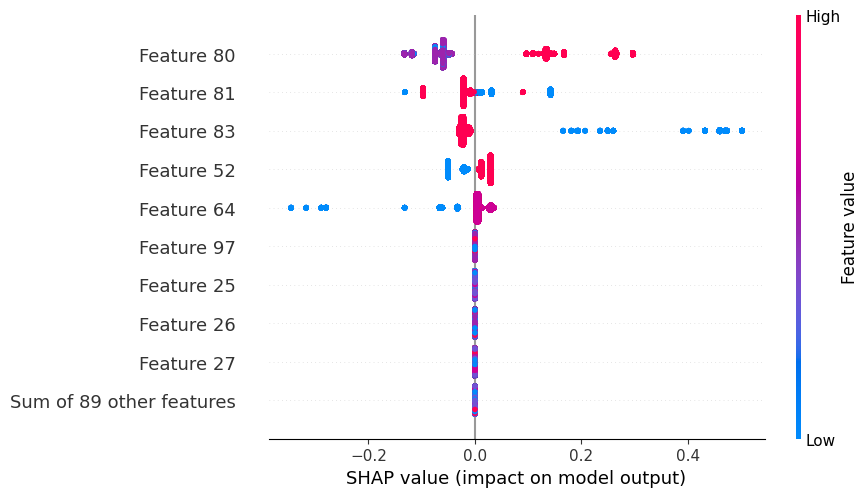

In [76]:
"""
To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample.
The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution
of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).
"""
shap.plots.beeswarm(explanation, show=False)
plt.savefig('outputs/01_SHAP/shap_beeswarm_plot_xg_4.png')
plt.show()

In [84]:
clustering = shap.utils.hclust(X, y)

99it [03:11,  2.13s/it]                        


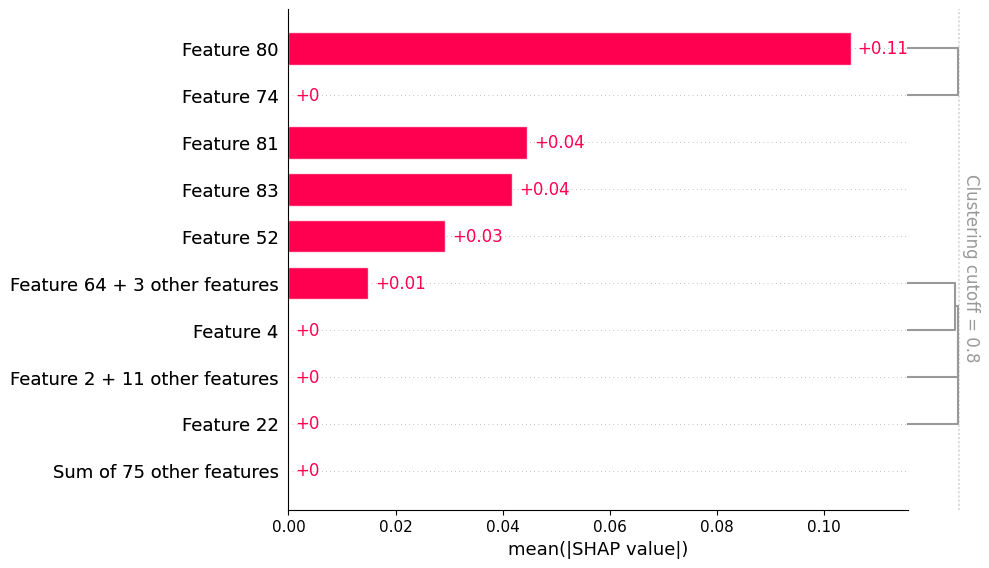

<Figure size 640x480 with 0 Axes>

In [87]:
shap.plots.bar(explanation, clustering=clustering, clustering_cutoff=0.8, show=False)
plt.savefig('outputs/01_SHAP/shap_cluster_md_3.png')
plt.show()

### XGBoost

max_depth = 4

In [117]:
# train a model with single tree
Xd = xgboost.DMatrix(X, label=y) 
model = xgboost.train({"eta": 1, "max_depth": 4, "base_score": 0, "lambda": 0}, Xd, 1)
baseline_error = np.linalg.norm(y - model.predict(Xd))
print("Baseline Model error =", baseline_error)
print(model.get_dump(with_stats=True)[0])

Baseline Model error = 114.42434474877987
0:[Q37- How do you rate your state of health in general?<3] yes=1,no=2,missing=2,gain=734.686035,cover=44535
	1:[Q42-During the last 12 months have you had a work accident?<2] yes=3,no=4,missing=4,gain=291.296387,cover=30778
		3:[Q22- Over the last 12 months have you personally experienced one or more of the following events:-An imposed change of position or profession<3] yes=7,no=8,missing=8,gain=37.1071777,cover=1296
			7:[Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?<3] yes=15,no=16,missing=16,gain=3.66300368,cover=105
				15:leaf=0.0769230798,cover=104
				16:leaf=2,cover=1
			8:[Q15- Indicate whether each of the following sentences suits you-I have the opportunity to develop my professional skills<3] yes=17,no=18,missing=18,gain=14.0446777,cover=1191
				17:leaf=0.62861073,cover=727
				18:leaf=0.851293087,cover=464
		4:[Q19- For each of the following points indicate whe

In [118]:
# Calculate model accuracy and F1 score

y_pred = model.predict(Xd)
y_pred = [1 if i > 0.5 else 0 for i in y_pred] # convert to binary
print(f"F1 Score {f1_score(y, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y, y_pred)}")

F1 Score 0.3813712753261904
Accuracy 0.7485124059728303


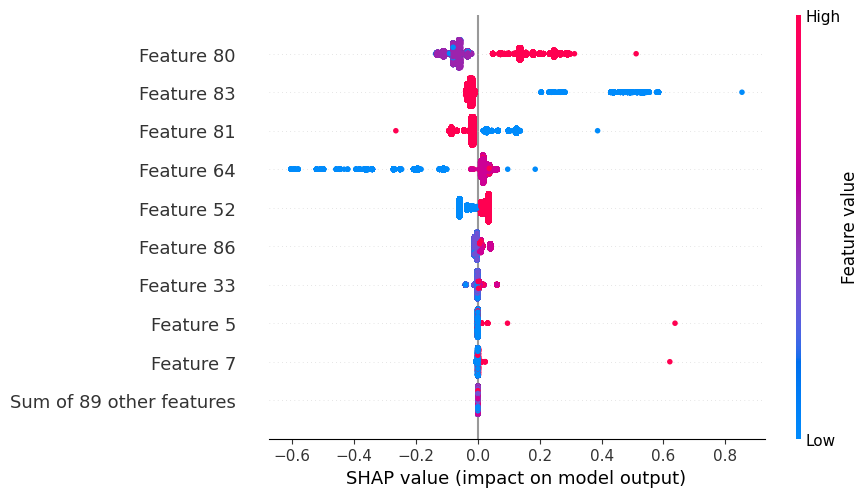

In [128]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

shap.plots.beeswarm(explanation, show=False) # plot the SHAP values
plt.figsize=(32,12)
plt.savefig('outputs/01_SHAP/shap_beeswarm_plot_xg_4.png')
plt.show()

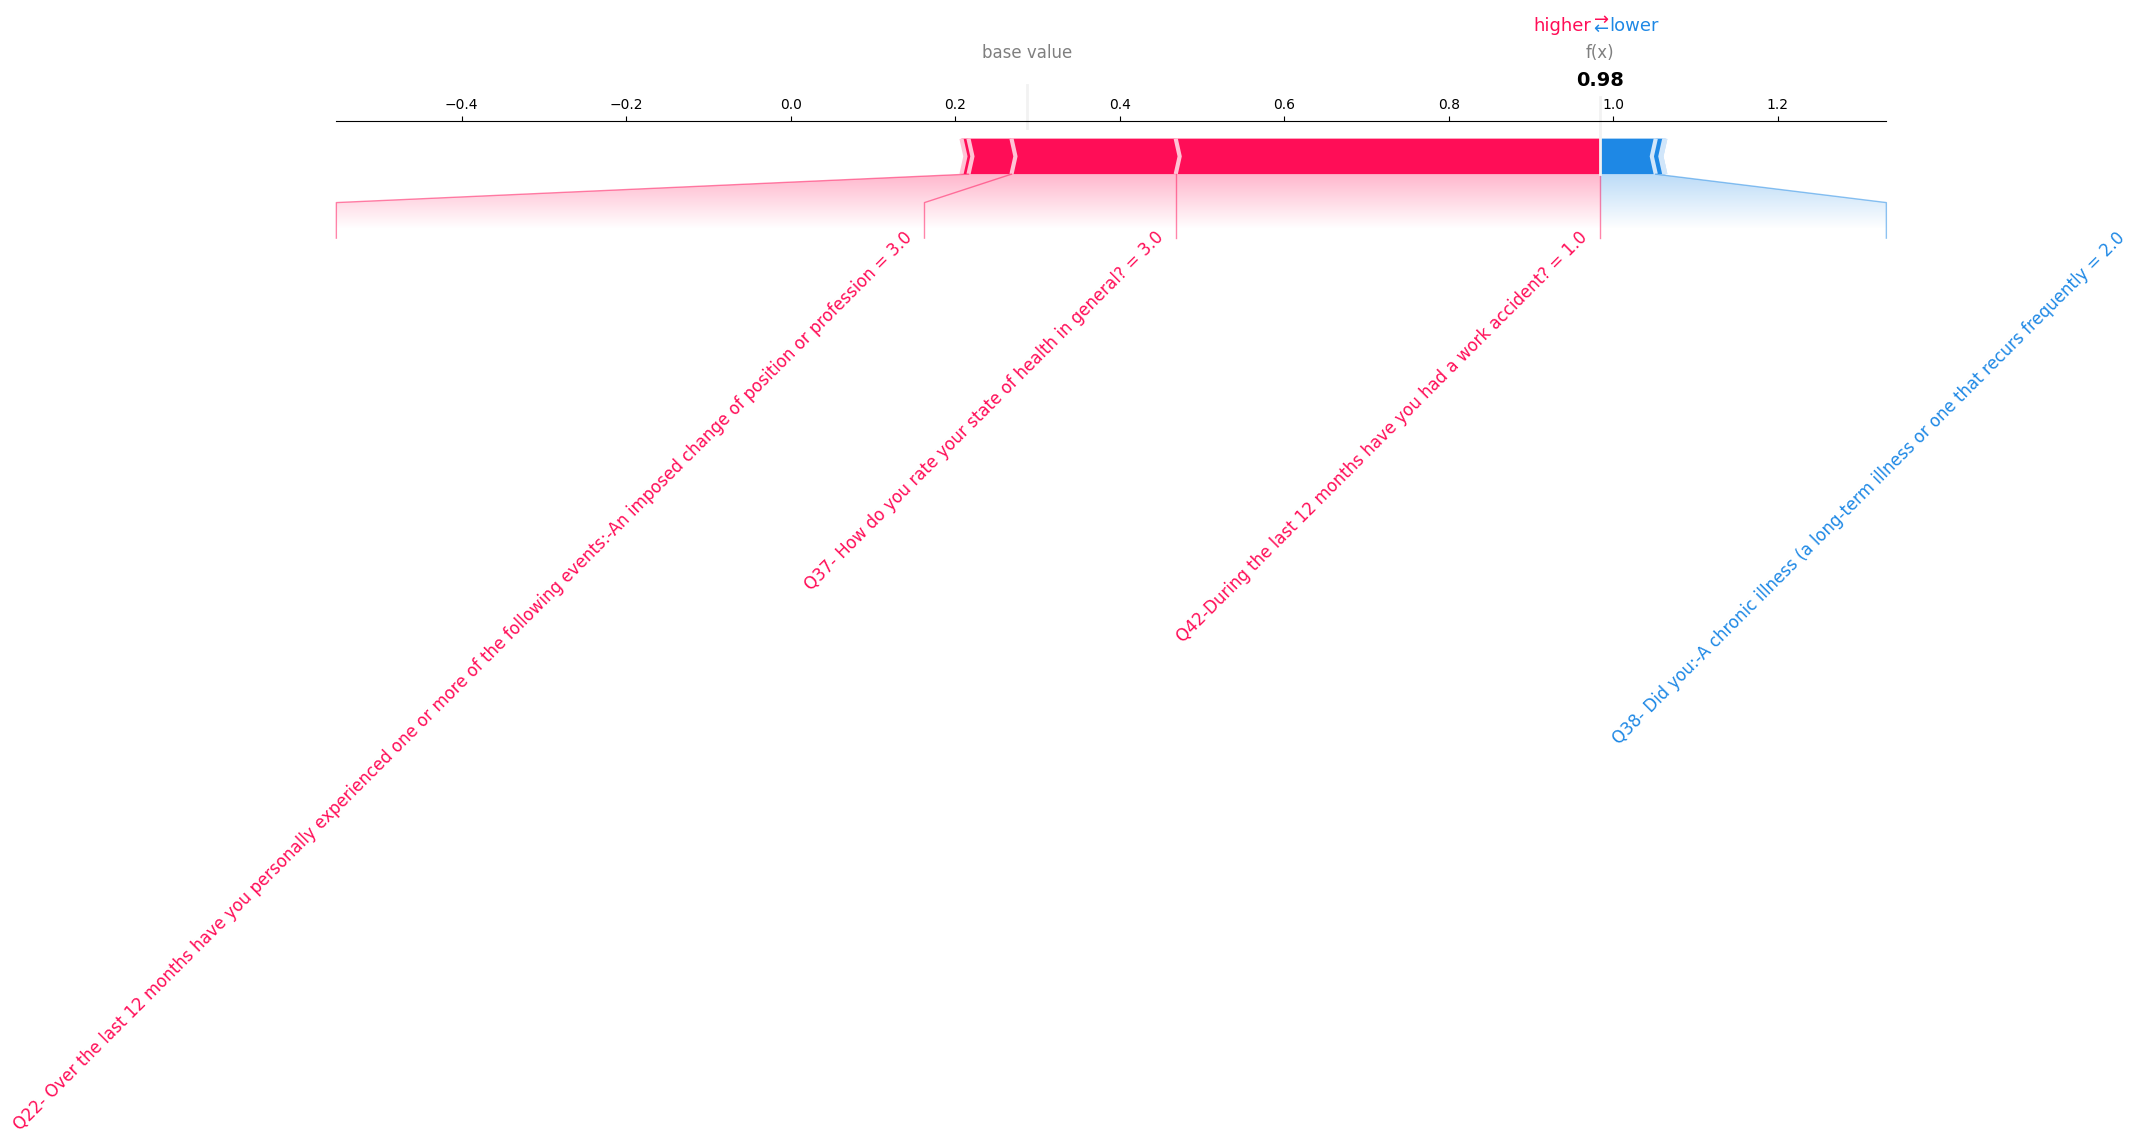

In [133]:
shap.force_plot(explanation.base_values[0], shap_values[0,:], X.iloc[0,:], text_rotation=45, matplotlib=True, show= False) # shows the shap values for the second prediction
plt.savefig('outputs/01_SHAP/shap_force_plot_xg_4.png')
plt.show()

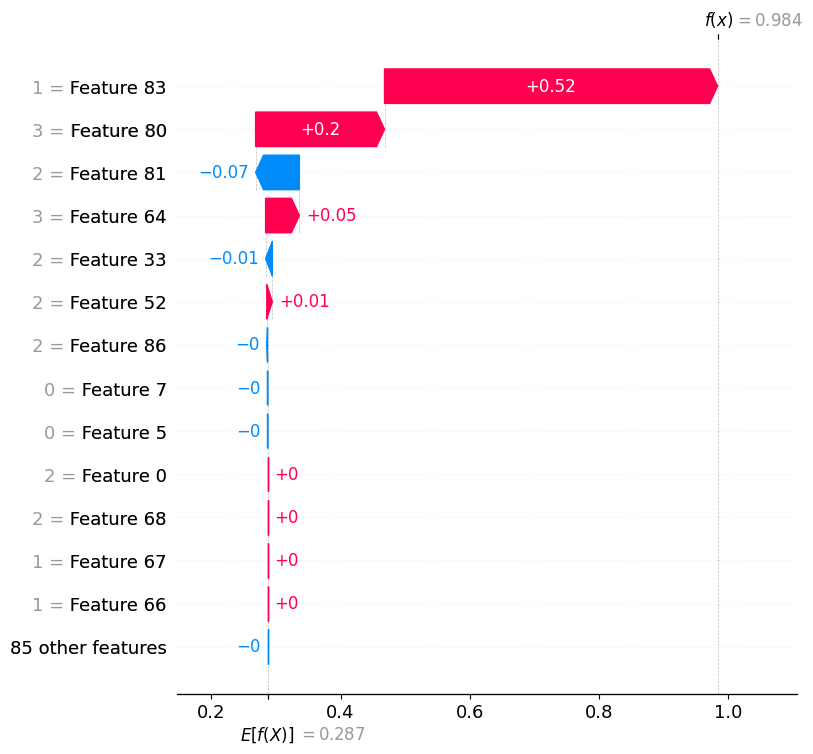

In [139]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explanation[0,:], max_display=14, show=False)
plt.figsize=(32,18)
plt.savefig('outputs/01_SHAP/shap_waterfall_plot_xg_4.png')
plt.show()

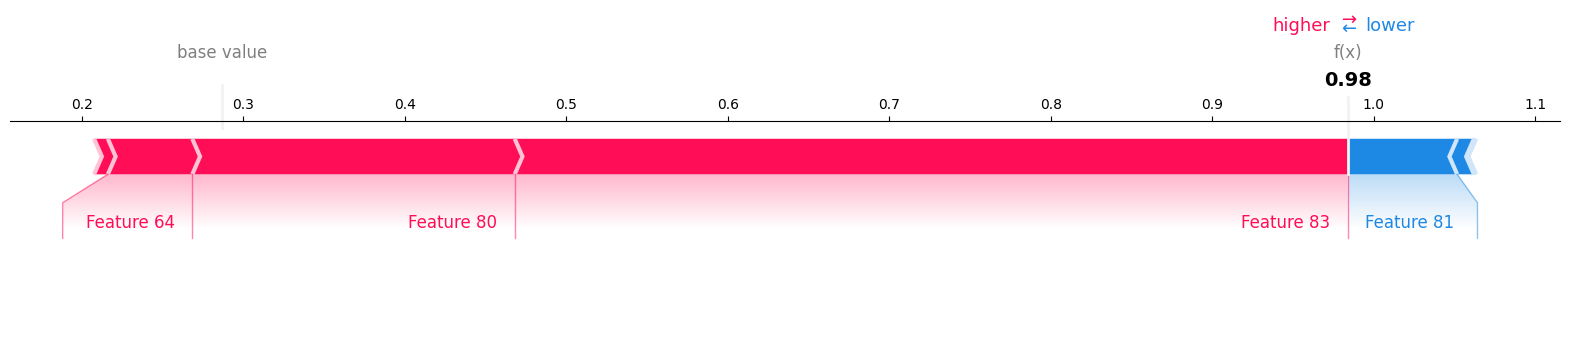

In [141]:
shap.plots.force(explainer.expected_value, shap_values[0, ...], show= False, matplotlib=True) # shap_values[0, ...] is the SHAP values for the first instance in the dataset ... is a numpy slice that means "all of the other axes"
plt.savefig('outputs/01_SHAP/shap_force_plot_xg_4_2.png')
plt.show()

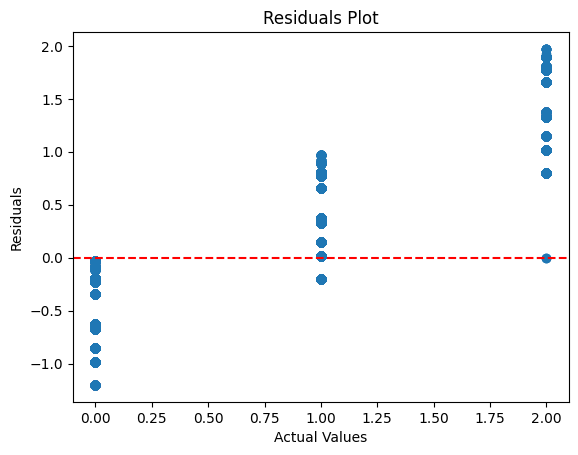

In [124]:
residuals = y - model.predict(Xd)
plt.scatter(y, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# save the plot
plt.savefig('outputs/01_SHAP/residuals_plot.png')
plt.show()

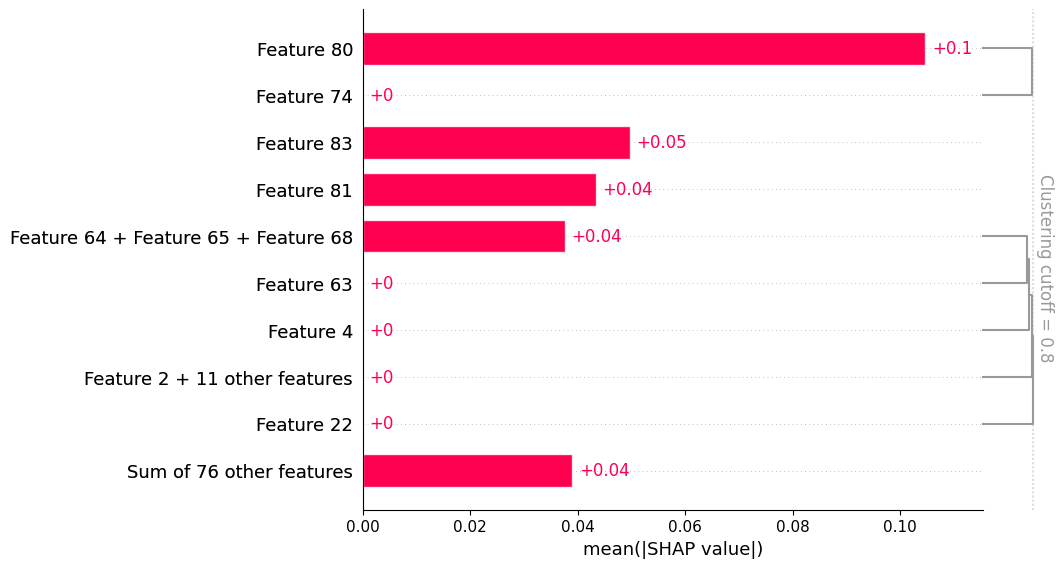

In [125]:
shap.plots.bar(explanation, clustering=clustering, clustering_cutoff=0.8, show=False)
plt.savefig('outputs/01_SHAP/shap_cluster_md_3.png')
plt.show()